03 PyTorch nn 
=====================
### Date: Jan 10 2018
### Author: Farahana

`Added Source: https://github.com/farahanams/DeepLearningZeroToAll/`

We will discuss the **nn** module. It provides higher-level abstraction just like **Keras**.
* It defines a set of Modules of neural network layers such as Sequential module in Keras.
* It also defines set of useful loss functions such as torch.nn.MSELoss.
* In addition, this module also hold internal state of Variables that it works with.

In [1]:
import torch as tc
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

Let us use the previous example and define it using **nn.module**.

In [2]:
# Initialization of the example
N, D_in, H, D_out = 24, 1000, 100, 4
learning_rate = 1e-3

dtype = tc.cuda.FloatTensor

x = Variable(tc.randn(N, D_in).type(dtype), requires_grad=True) # input
y = Variable(tc.randn(N, D_out).type(dtype), requires_grad=False) # output

We have to define abstraction of the neural network that we previously have used. 

In [3]:
model = nn.Sequential(nn.Linear(D_in,H), nn.ReLU(), nn.Linear(H, D_out)).cuda() 
# execute using GPU with.cuda()

**Sequential** module takes a sequence of layers that could receive other **nn.module**.
* **nn.Linear()** defines the first layer that receives input,**x** and outputs other Variables.
* **nn.ReLU()** defines the activation layer that receives input from the first layer and outputs the clamped Variables.
* **nn.Linear()** defines the second layer that receives clamped Variables and outputs other Variables.

In [4]:
model

Sequential(
  (0): Linear(in_features=1000, out_features=100)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=4)
)

With defined model, **weights** are defined internally inside the model when used in the computaions. Now, we could define the loss functions using **nn.module**. 

$${loss}(x, y)  = 1/n \sum |x_i - y_i|^2$$

In [5]:
loss_fn = nn.MSELoss(size_average=False) # avoid size averaging with 'n' element

In [6]:
for t in range(200):
    # The sequential model is called like a function that receives input, x 
    # and output the predicted output, y_pred.
    y_pred = model(x)
    
    # calculating the loss with x=y_pred and y=y_expected
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])
    
    # zeroing the gradients each time before backward computation. Replacing the 'w1_new.grad.data.zero_()'
    model.zero_grad()
    loss.backward()
    
    # Now, each set of weights are called with nn.module.parameters() and updated
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 75.6502914428711
1 34.81554412841797
2 18.56421661376953
3 10.315837860107422
4 5.834240436553955
5 3.32458758354187
6 1.9198143482208252
7 1.1251261234283447
8 0.6750346422195435
9 0.413327693939209
10 0.2575715482234955
11 0.1632404923439026
12 0.10521600395441055
13 0.06888440251350403
14 0.04575295001268387
15 0.030809152871370316
16 0.020993873476982117
17 0.014418864622712135
18 0.010001510381698608
19 0.007000824902206659
20 0.004943580832332373
21 0.003518520388752222
22 0.0025231579784303904
23 0.0018224160885438323
24 0.0013253279030323029
25 0.0009702412644401193
26 0.0007159261731430888
27 0.0005317777977325022
28 0.00039746647235006094
29 0.00029889712459407747
30 0.00022608648578170687
31 0.00017198162095155567
32 0.0001315425761276856
33 0.00010112916061189026
34 7.813461706973612e-05
35 6.0649257648037747e-05
36 4.7284633183153346e-05
37 3.7018053262727335e-05
38 2.9093120247125626e-05
39 2.2945339878788218e-05
40 1.8158823877456598e-05
41 1.4413997632800601e-05
42 1.

As usual, we will check the expected vs predicted output

In [7]:
print(y, y_pred)

Variable containing:
-0.6496 -0.4227 -1.1463 -0.3795
 0.0976 -0.0083 -1.1085 -0.8823
-2.3640  0.1273 -0.8051 -1.0918
 0.2950 -0.9567  0.0137 -1.0619
-0.0589  0.1522  0.7067 -1.0940
-0.9402 -1.1008  0.1465 -1.0812
 0.9588 -1.7039  0.3469  1.1945
-0.0608 -0.4277  0.5560  0.5204
-1.1139  0.8071  0.3739  0.3287
-0.1438  0.1531  1.5651 -0.1208
-0.3952  0.1708 -0.9400 -0.4823
-1.1603 -1.8515  1.2225  0.4915
 1.5582  1.7589  1.3023  1.3325
-0.4448  1.2730 -0.7684 -0.1216
-1.4069 -0.5072  0.3938 -0.0016
-1.2708  0.4589  0.8487  0.4459
-1.0207  0.9144 -1.0939 -1.5429
-0.7213 -0.9262 -0.6361  0.5749
-1.0738 -0.3440  1.0316 -1.6731
-0.3708  0.3138 -0.7776  1.8608
 1.0102  0.4858 -0.5503 -1.0134
 0.0428  0.5109 -0.2697  0.6546
 0.6380  1.0079  0.2307 -0.5711
 0.7821 -0.1168  0.4810  1.3921
[torch.cuda.FloatTensor of size 24x4 (GPU 0)]
 Variable containing:
-0.6496 -0.4227 -1.1463 -0.3795
 0.0976 -0.0083 -1.1085 -0.8823
-2.3640  0.1273 -0.8051 -1.0918
 0.2950 -0.9567  0.0137 -1.0619
-0.0589  0.1522

Now, we have 3 types of implementation to the first example introduced. 
Let us learn new and simple example using the three types of modules; **Variable**, **Autograd** and **nn**.

### Linear Regression with PyTorch ###
Linear regression is a basic of neural network layer. But, first let us initialize the example.

In [8]:
N, D_in, D_out = 60, 1, 1
learning_rate = 1e-3

dtype = tc.cuda.FloatTensor

x = Variable(tc.Tensor([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], 
                        [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], 
                        [7.997], [3.1]]).type(dtype), requires_grad=False) #define x

y = Variable(tc.Tensor([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366],
                        [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], 
                        [2.904], [1.3]]).type(dtype), requires_grad=False) #define y

Defining linear regression using **nn.Linear** module

$$y = xw + b$$

In [9]:
LR = nn.Linear(1,1, bias =True).cuda()

Let us define activation function using sigmoid function of **nn.Sigmoid**

$$f(x) = \frac{1}{1+e^{-x}}$$

In [10]:
sigmoid = nn.Sigmoid()

And, let us put it together to become a model using **nn.Sequential**;

In [11]:
modelLR = nn.Sequential(LR, sigmoid)
print (modelLR)

Sequential(
  (0): Linear(in_features=1, out_features=1)
  (1): Sigmoid()
)


And let us use same loss function from previous example. 

In [12]:
loss_fn = nn.MSELoss(size_average=False) # avoid size averaging with 'n' element

And now, let us train the model with 5000 epochs.:

In [13]:
for t in range(5000):
    # Calling the model
    y_pred = modelLR(x)
    
    # calculating the loss with x=y_pred and y=y_expected
    loss = loss_fn(y_pred, y)
    if t%100 == 0:
        print(t, loss.data[0])
    
    # zeroing the gradients each time before backward computation. Replacing the 'w1_new.grad.data.zero_()'
    modelLR.zero_grad()
    loss.backward()
    
    # Now, each set of weights are called with nn.module.parameters() and updated
    for param in modelLR.parameters():
        param.data -= learning_rate * param.grad.data

0 34.71846008300781
100 34.64232635498047
200 34.60383605957031
300 34.58026885986328
400 34.56421661376953
500 34.55250930786133
600 34.54356384277344
700 34.53648376464844
800 34.530731201171875
900 34.52595138549805
1000 34.52191162109375
1100 34.51844787597656
1200 34.51544189453125
1300 34.51280975341797
1400 34.51047897338867
1500 34.50840377807617
1600 34.50653839111328
1700 34.50485610961914
1800 34.503326416015625
1900 34.501930236816406
2000 34.50065612792969
2100 34.499481201171875
2200 34.49839401245117
2300 34.49739074707031
2400 34.49645233154297
2500 34.495582580566406
2600 34.494773864746094
2700 34.49401092529297
2800 34.49329376220703
2900 34.49262237548828
3000 34.49198913574219
3100 34.49138641357422
3200 34.490821838378906
3300 34.49028396606445
3400 34.48977279663086
3500 34.489288330078125
3600 34.48883056640625
3700 34.48838806152344
3800 34.487972259521484
3900 34.48756790161133
4000 34.4871826171875
4100 34.486820220947266
4200 34.48646926879883
4300 34.486129

After a very long interations, it seems the loss is very big and hardly converge, let us check the predictions

In [14]:
print (y_pred, y)

Variable containing:
 0.9974
 0.9995
 0.9999
 1.0000
 1.0000
 0.9993
 1.0000
 1.0000
 1.0000
 0.9855
 1.0000
 1.0000
 0.9999
 1.0000
 0.9965
[torch.cuda.FloatTensor of size 15x1 (GPU 0)]
 Variable containing:
 1.7000
 2.7600
 2.0900
 3.1900
 1.6940
 1.5730
 3.3660
 2.5960
 2.5300
 1.2210
 2.8270
 3.4650
 1.6500
 2.9040
 1.3000
[torch.cuda.FloatTensor of size 15x1 (GPU 0)]



This happens because we set the activation function to be sigmoid and the y_pred is set to be between [-1,1]

Let us redefine the model by using only **LR=nn.Linear()**.

In [15]:
for t in range(50000):
    # Calling the model
    y_pred = LR(x)
    
    # calculating the loss with x=y_pred and y=y_expected
    loss = loss_fn(y_pred, y)
    if t%1000 == 0:
        print(t, loss.data[0])
    
    # zeroing the gradients each time before backward computation. Replacing the 'w1_new.grad.data.zero_()'
    LR.zero_grad()
    loss.backward()
    
    # Now, each set of weights are called with nn.module.parameters() and updated
    for param in modelLR.parameters():
        param.data -= learning_rate * param.grad.data

0 1053.002197265625
1000 2.533729076385498
2000 2.533728837966919
3000 2.533728837966919
4000 2.533728837966919
5000 2.533728837966919
6000 2.533728837966919
7000 2.533728837966919
8000 2.533728837966919
9000 2.533728837966919
10000 2.533728837966919
11000 2.533728837966919
12000 2.533728837966919
13000 2.533728837966919
14000 2.533728837966919
15000 2.533728837966919
16000 2.533728837966919
17000 2.533728837966919
18000 2.533728837966919
19000 2.533728837966919
20000 2.533728837966919
21000 2.533728837966919
22000 2.533728837966919
23000 2.533728837966919
24000 2.533728837966919
25000 2.533728837966919
26000 2.533728837966919
27000 2.533728837966919
28000 2.533728837966919
29000 2.533728837966919
30000 2.533728837966919
31000 2.533728837966919
32000 2.533728837966919
33000 2.533728837966919
34000 2.533728837966919
35000 2.533728837966919
36000 2.533728837966919
37000 2.533728837966919
38000 2.533728837966919
39000 2.533728837966919
40000 2.533728837966919
41000 2.533728837966919
42000

In [16]:
print (y_pred, y)

Variable containing:
 1.6056
 1.8916
 2.1776
 2.4922
 2.5494
 1.8313
 3.2901
 2.3549
 2.7210
 1.3111
 2.5785
 3.5532
 2.1290
 2.8268
 1.5536
[torch.cuda.FloatTensor of size 15x1 (GPU 0)]
 Variable containing:
 1.7000
 2.7600
 2.0900
 3.1900
 1.6940
 1.5730
 3.3660
 2.5960
 2.5300
 1.2210
 2.8270
 3.4650
 1.6500
 2.9040
 1.3000
[torch.cuda.FloatTensor of size 15x1 (GPU 0)]



It seems that the prediction not converge. And this actually a good enough model for a linear regression.

However, we could improve the model with optimization and regularization. We will learn this in next part using Pytorch.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
xx = (x.data.cpu()).numpy()
yy = (y.data.cpu()).numpy()

In [19]:
y_p = (y_pred.data.cpu()).numpy()

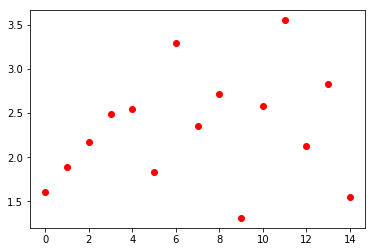

In [20]:
plt.plot(y_p, 'ro')

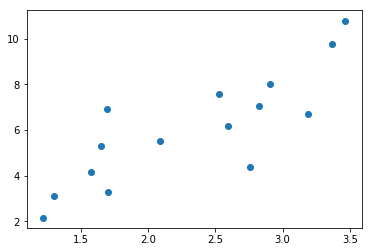

In [21]:
plt.scatter(yy, xx)